## Part 1: basics

In [1]:
# @title Basic Operations

In [2]:
# Imports
import numpy as np                 
import matplotlib.pyplot as plt

In [3]:
# @title Exercise 1.1: pick values from an array

It's important to know how to select values from an array. For instance, we want to be able to **select from an array of possible actions according to some policy** (e.g. take the action with the maximum value). Let's try this:
- Define an **array of 100 random numbers**. There are many ways of how to do this using numpy commands, such as 'random.rand' or 'random.randint'. Imagine this reflects an action space of 100 different actions and each of these have a value. You can print the array if you want.
- **Pick the maximum number** of those values and print it. The numpy command 'amax' will be useful here.
- Find the *action* that has highest value. That means you don't want the the maximum *value*, but the **index of the array that has maximum value**. The easiest way is to find the numpy command that finds the maximum *argument*, but you can also use logical indexing. 


You can do this in three lines of code:
- Define an array with 100 random values
- Find it's maximum
- Find the index of its maximum

You can think about this yourself, but feel free to check the hints/solutions below. 'Partial Solutions' provide the basic structure of the solution, 'Full Solutions' implement the full problem.

In [14]:
# let's simulate 100 "values"
simulate_vals = np.random.rand(100) # generate 100 random values between 0 and 1

# obtain the maximum of the above array
max_val = np.max(simulate_vals)

# find the corresponding action to that value, i.e. the action that has highest value
argmax_val = np.argmax(simulate_vals) # version with numpy command

print("Output should look like this:")

print(simulate_vals)

print("Maximum value is: " + str(max_val) + ', corresponding action is: ' + str(argmax_val))

Output should look like this:
[0.67496853 0.93548713 0.51748152 0.01430334 0.16123095 0.70031741
 0.30864913 0.12142773 0.39434752 0.23806678 0.6221844  0.7987324
 0.27508624 0.80510271 0.77080597 0.72528521 0.46259535 0.41299154
 0.3076985  0.39223268 0.42920672 0.12823724 0.45624437 0.4408585
 0.52180968 0.07807342 0.42668369 0.8538436  0.87478276 0.5303804
 0.11884581 0.35159241 0.00539763 0.52802151 0.60223514 0.51065672
 0.42945248 0.09642367 0.29402166 0.71512646 0.46906251 0.0192225
 0.33255178 0.4127137  0.53920023 0.94523911 0.04037755 0.38972404
 0.76038719 0.96090818 0.40476813 0.62288372 0.62335495 0.52261645
 0.66668492 0.24931112 0.32439552 0.93618049 0.60364202 0.84605334
 0.34596803 0.00670884 0.42346149 0.39415754 0.02850561 0.91584651
 0.59076535 0.83123302 0.80359584 0.50277172 0.4321494  0.0384051
 0.94813054 0.1840841  0.25536838 0.43926514 0.67390388 0.8057646
 0.57485704 0.51947977 0.66971075 0.24101485 0.64233957 0.77459082
 0.54657684 0.32515286 0.19810883 0.60

In [5]:
# @title Exercise 1.2: Sample a number with a certain probability

We often have to **sample a number from an array with a certain probability**. For example, a goal state might deliver a *stochastic* reward, where the animal gets a reward with 80% probability and no reward with 20% probability.
Let's try this:
- Specify an array that has two values: 0 and 1. Although not strictly necessary, use the numpy function np.array().
- Sample a *reward* from this array, where the sampled value should be 0 with 20% probability and 1 with 80% probability. The numpy function 'random.choice' is helpful here.
- Print the selected value.

In [16]:
reward_vals = np.array([0,1])

reward = np.random.choice(reward_vals, 1, True, [0.2,0.8])
# np.random.choice(reward_vals) <=> np.random.choice(reward_vals, 1, True, [0.5,0.5])!

print("Output should look like this:")

print("Available rewards: " + str(reward_vals) + ", sampled reward: " + str(reward))

Output should look like this:
Available rewards: [0 1], sampled reward: [1]


## Part 2: For-loops, if-statements, plotting, and functions

In [7]:
# @title For-loops and if-statements

For-loops and if-statements are very useful and quite straightforward. Keep in mind that Python starts counting at 0!

In [8]:
# @title Functions

It is also really good to implement modular coding and use functions, esp. when re-using bits of code.
For example, note that above we copied and pasted our plotting commands as well as the the computations for v. It would be much easier to implement those as functions.

In [9]:
# Let's define the plotting function:

def plot_vals(time_x,value_y,title_plot="Some non-linear function",
              x_lab="Time",y_lab="Value v",plt_type='ko',y_lim=[]):
  plt.figure()
  plt.title(title_plot)
  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.plot(time_x,value_y,plt_type)
  if len(y_lim)>0: # len() is a basic python function that outputs the length of an array/list
    plt.ylim(y_lim)
  plt.show()

Now, creating the same plot is much easier:

In [10]:
# @title Exercise 2.1: Sample lots of rewards in different trials

Can you write a **for-loop** going through **50 trials**, where in each trial one **reward is sampled** according to the **probabilities specified above**? Finally, can you **plot** the result?

Output should look like this:


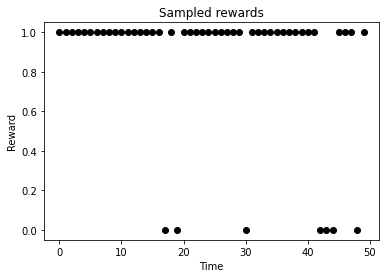

In [17]:
n_steps = 50

time_steps = np.arange(n_steps) # this will generate a range from 0 to n_steps-1

reward = np.zeros(n_steps) # initialise values

reward_vals = np.array([0,1])

for iter in time_steps:
  reward[iter] = np.random.choice(reward_vals, 1, True, [0.2,0.8])

print("Output should look like this:")

plot_vals(time_steps,reward,"Sampled rewards",x_lab="Time",y_lab="Reward",plt_type='ko')

When you run this several times, what do you observe? What is changing and what remains constant?

In [12]:
# @title Exercise 2.2: Action selection

Now, let's think more about the **action selection problem**. Fundamental to reinforcement learning is the **exploitation-exploration trade-off**, i.e. the question whether you should choose the (what you think is the) optimal action to maximise reward or some other action to learn about the environment. 

A simple way to solve this is to be **$\epsilon$-greedy**. That means that agents select the current best action with (some high) probability of 1-$\epsilon$, but select a random (exploratory) action with (some small) probability $\epsilon$.

This requires a bit more thought, but let's try to implement this:
- **Simulate again 50 trials**, but now also **define 100 random action values** (once! Not in each trial, i.e. *before* the for-loop) as above.
- Define a small **$\epsilon=0.05$**
- In every iteration, **chose a current action**
- The current action should be the **maximum argument of the random values with probability $1-\epsilon$**, or a **random choice of any acttion with probability $\epsilon$**. One way to achieve this is to **draw a random number** between 0 and 1, and chose the best action if this random number is $<=.95$ or a random action if this random number is $>.95$
- Finally, **plot** the value of the chosen actions over time

Don't worry if this feels tricky :) - we will discuss this in much more detail later. You can simply take a look at the full solution and see if the code makes sense, but feel free to try it yourself. If you run the solution several times, what do you observe?

Output should look like this:


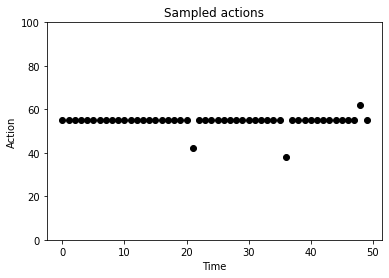

In [19]:
n_steps = 50

n_actions = 100

time_steps = np.arange(n_steps) # this will generate a range from 0 to n_steps-1

action = np.zeros(n_steps) # initialise values

simulate_vals = np.random.rand(n_actions)

epsilon = 0.05

for iter in time_steps:

  rand_num = np.random.rand(1)

  if rand_num <= 1-epsilon:
    action[iter] = np.argmax(simulate_vals)
  else:
    action[iter] = np.random.choice(n_actions,1)

print("Output should look like this:")

plot_vals(time_steps,action,"Sampled actions",x_lab="Time",y_lab="Action",y_lim=[0,n_actions])

## Part 3: Some (very) basic RL - learn the value of an action

If you understand the above code that's a great start. Now let's model the behaviour of this chicken here:

Video available at https://www.youtube.com/watch?v=OQtVYlkia_YOQtVYlkia_Y


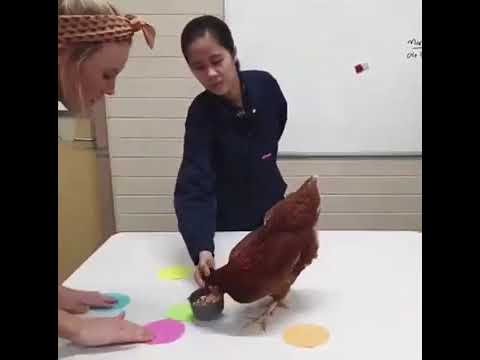

In [ ]:
# @title Video: RL in action
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='OQtVYlkia_Y', width=554, height=380, fs=1)
print("Video available at https://www.youtube.com/watch?v=OQtVYlkia_Y" + video.id)
video

In [ ]:
# @title Value of an action

We've seen that we can define a simple step-wise update rule to account for reward-based learning.

Here, a chicken learns that **picking the pink option** is valuable. We can write this as an (overly simplistic!) update rule:

$$V(PinkCircle)_{t+1}=V(PinkCircle)_{t}+\alpha(r-V(PinkCircle)_{t})$$

This means we need to specify a **learning rate** $\alpha$ and a **reward value**. We also need to initialise $V(PinkCircle)$.

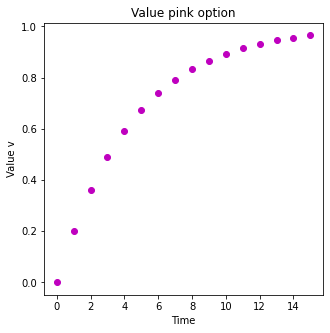

In [ ]:
# chicken learns that picking the pink option is valuable

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

# let's assume that 1 food item yields a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

# we initialise the value of choosing the pink option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):
  v[iter+1] = v[iter] + alpha * (r - v[iter])

plt.rcParams['figure.figsize'] = [5, 5]
plot_vals(np.arange(n_steps),v,"Value pink option","Time","Value v",'mo')

In [ ]:
# @title Exercise 3.1: Learning rate

Can you explore what happens when you **change the learning rate**? What do you observe? You can simply produce different plots with different learning rates using the code above. The full solution below shows a more concise way of doing this.

In [ ]:
# Your code goes here - or simple change the alpha parameter above to produce different plots

In [21]:
# @title Full Solution
def Rescorla_Wagner(alpha = 0.2,r = 1,n_steps = 16):
  
  v     = np.zeros(n_steps)

  for iter in np.arange(n_steps-1):
    v[iter+1] = v[iter] + alpha * (r - v[iter])

  return v

v_1 = Rescorla_Wagner(0.01)
v_2 = Rescorla_Wagner(0.2)
v_3 = Rescorla_Wagner(0.8)

print("Output should look like this:")

plt.rcParams['figure.figsize'] = [5, 5]
plt.figure()
plt.title("Value pink option, different learning rates")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(len(v_1)),v_1,'mo',label="Small learning rate")
plt.plot(np.arange(len(v_2)),v_2,'bo',label="Medium learning rate")
plt.plot(np.arange(len(v_3)),v_3,'yo',label="Large learning rate")
plt.legend()
plt.show()

How can a learning rate that is too high or too low be harmful?

In [ ]:
# @title Exercise 3.2: Stochastic reward

Now, what happens if the **reward is not deterministic**, but follows a stochastic function as above? Implement the **stochastic reward sampling in the value-learning code above**. How does this affect value learning?

Run **several simulations** based on stochastic reward. What do you observe about value learning?

In [ ]:
# Your code goes here

In [ ]:
# @title Partial Solution

# chicken learns that picking the pink option is valuable

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

#####
# uncomment and fill in the blanks:
# generate an array of possible reward values (i.e., [0,1])
# reward_vals = ...
#####

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

# we initialise the value of choosing the pink option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)

#####
# uncomment:
# for iter in np.arange(n_steps-1):
#####

  #####
  # uncomment and fill in the blanks:
  # for each iteration, sample one reward from the reward values 
  # according to the biased probabilities defined above
  # Then, use this reward in the value updating below
  # for iter in time_steps:
  #   r = ...
  #####

  #####
  # uncomment:
  # v[iter+1] = v[iter] + alpha * (r - v[iter])
  #####

plot_vals(np.arange(n_steps),v,"Value pink option","Time","Value v",'mo')

In [ ]:
# @title Full Solution

# chicken learns that picking the pink option is valuable

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

# let's assume that 1 food item yields a reward of 1
reward_vals = [0,1]

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

# we initialise the value of choosing the pink option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):

  r = np.random.choice(reward_vals, 1, True, [0.2,0.8])

  v[iter+1] = v[iter] + alpha * (r - v[iter])

print("Output should look like this:")

plot_vals(np.arange(n_steps),v,"Value pink option","Time","Value v",'mo')

In [ ]:
# @title Bonus: Value of an action and action selection

However, the chicken actually also has **alternative options** (5 in the end). This means it has to **translate values for picking a particular option into actions**.

How might this work? A straightforward idea would be to **always pick the option with the highest value**. This provides an accurate description of the chicken's behaviour, but we will see that this isn't going to work very well in general.

Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0


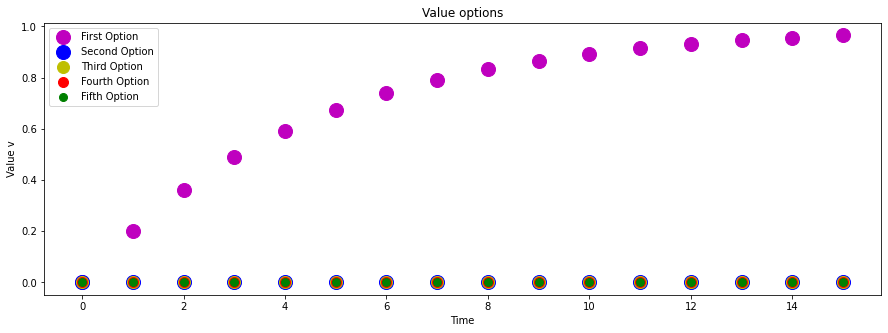

In [ ]:
# chicken learns that picking the pink option is valuable
# However:
# We now also account for (up to) 5 alternative options
# we introduce an option for action selection by choosing the option with highest value

# initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 5

TS_0 = 0 # time setp when first option is introduced (note we start counting at 0)
TS_1 = 2 
TS_2 = 6
TS_3 = 7
TS_4 = 9

# we initialise the value of choosing an option as 0
# (initial values are important in more complicated examples)
v = np.zeros((n_steps,n_options))

for iter in np.arange(n_steps-1):
  # there is only one action available until the second option is introduced:
  if iter<TS_1:
    pick_option = 0
  else:
    pick_option = np.argmax(v[iter,:])
  print("Chosen option: " + str(pick_option))

  v[iter+1,pick_option] = v[iter,pick_option] + alpha * (r - v[iter,pick_option])

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v[:,0],'mo',markersize=14,label="First Option")
plt.plot(np.arange(n_steps),v[:,1],'bo',markersize=14,label="Second Option")
plt.plot(np.arange(n_steps),v[:,2],'yo',markersize=12,label="Third Option")
plt.plot(np.arange(n_steps),v[:,3],'ro',markersize=10,label="Fourth Option")
plt.plot(np.arange(n_steps),v[:,4],'go',markersize=8,label="Fifth Option")
plt.legend()
plt.show()

Can you tell what's going on in this plot?

In [ ]:
# @title Bonus Exercise 3.3: Epsilon-greedy

Can you **implement the epsilon greedy action selection** as definied above? Let's assume the chicken is always rewarded, no matter what it does. Increase epsilon to $\epsilon=0.2$ to make the effect more visible.

Note that the **random action selection needs to be sensitive to the number of currently available options**!

This is more tricky than the previous exercises - it's fine to just run the full solution and try to figure out what's going on.

In [ ]:
# Your code goes here

In [ ]:
# @title Partial Solution

# chicken learns that picking the pink option is valuable
# However:
# We now also account for (up to) 5 alternative options
# we introduce an option for action selection by choosing the option with highest value

# initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 5

TS_0 = 0 # time setp when first option is introduced (note we start counting at 0)
TS_1 = 2 
TS_2 = 6
TS_3 = 7
TS_4 = 9

#####
# uncomment and fill in the blanks:
# Define a higher epsilon of 0.2 to make 
# the random choices more visible
# epsilon = ...
#####

# we initialise the value of choosing an option as 0
# (initial values are important in more complicated examples)
v = np.zeros((n_steps,n_options))

n_actions = 1 # we start with one action

#####
# uncomment
# for iter in np.arange(n_steps-1):
#####

  # there is only one action available until the second option is introduced:
  #####
  # uncomment
  # if iter<TS_1:

  #   pick_option = 0

  # else: # implement epsilon-greedy:

  #   if (iter==TS_1 or iter==TS_2 or iter==TS_3 or iter==TS_4):
  #     n_actions += 1 # increase number of actions if new option is introduced
    
  #   #####
  #   # uncomment and fill in the blanks:
  #   # Define one random number between 0 and 1
  #   # rand_num = ...
  #   #####

  #   #####
  #   # uncomment and fill in the blanks:
  #   #  if this random number is smaller or equal to 
  #   # 1-epsilon, choose the action (in pick_option) that has maximum value
  #   #  Otherwise, randomly chose one action (from the range of 0 to n_actions)
  #   # if rand_num <= ...:
  #   #   pick_option = ...
  #   # else:
  #   #   pick_option = ...
  #   #####
    

  # print("Chosen option: " + str(pick_option))

  # # values at the next time step are the values from the current time step
  # v[iter+1,:] = v[iter,:]
  # # except that the chosen option is updated
  # v[iter+1,pick_option] = v[iter,pick_option] + alpha * (r - v[iter,pick_option])
  #####

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v[:,0],'mo',markersize=14,label="First Option")
plt.plot(np.arange(n_steps),v[:,1],'bo',markersize=14,label="Second Option")
plt.plot(np.arange(n_steps),v[:,2],'yo',markersize=12,label="Third Option")
plt.plot(np.arange(n_steps),v[:,3],'ro',markersize=10,label="Fourth Option")
plt.plot(np.arange(n_steps),v[:,4],'go',markersize=8,label="Fifth Option")
plt.legend()
plt.show()

Chosen option: 0
Chosen option: 0
Chosen option: [1]
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: [2]
Chosen option: 0
Chosen option: [4]
Chosen option: [3]
Chosen option: 0
Chosen option: 0
Chosen option: 0
Chosen option: 0
Output should look like this:


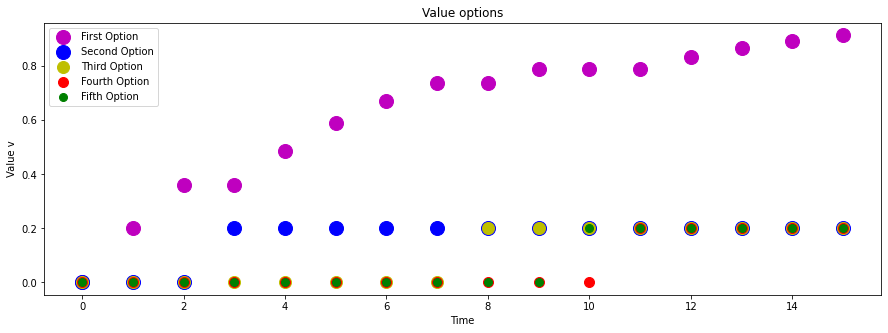

In [ ]:
# @title Full Solution

# chicken learns that picking the pink option is valuable
# However:
# We now also account for (up to) 5 alternative options
# we introduce an option for action selection by choosing the option with highest value

# initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 1

n_steps = 16 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 5

TS_0 = 0 # time setp when first option is introduced (note we start counting at 0)
TS_1 = 2 
TS_2 = 6
TS_3 = 7
TS_4 = 9

epsilon = 0.2

# we initialise the value of choosing an option as 0
# (initial values are important in more complicated examples)
v = np.zeros((n_steps,n_options))

n_actions = 1 # we start with one action

for iter in np.arange(n_steps-1):
  # there is only one action available until the second option is introduced:
  if iter<TS_1:

    pick_option = 0

  else: # implement epsilon-greedy:

    if (iter==TS_1 or iter==TS_2 or iter==TS_3 or iter==TS_4):
      n_actions += 1 # increase number of actions if new option is introduced
    
    rand_num = np.random.rand(1)

    if rand_num <= 1-epsilon:
      pick_option = np.argmax(v[iter,:])
    else:
      pick_option = np.random.choice(n_actions,1)

  print("Chosen option: " + str(pick_option))

  v[iter+1,:] = v[iter,:]
  v[iter+1,pick_option] = v[iter,pick_option] + alpha * (r - v[iter,pick_option])

print("Output should look like this:")

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v[:,0],'mo',markersize=14,label="First Option")
plt.plot(np.arange(n_steps),v[:,1],'bo',markersize=14,label="Second Option")
plt.plot(np.arange(n_steps),v[:,2],'yo',markersize=12,label="Third Option")
plt.plot(np.arange(n_steps),v[:,3],'ro',markersize=10,label="Fourth Option")
plt.plot(np.arange(n_steps),v[:,4],'go',markersize=8,label="Fifth Option")
plt.legend()
plt.show()

In RL, we often want to **fit a model to behaviour**, i.e. find the parameter values and model architecture that best describes real behaviour from one individual.

In the example above, can you say what kind of parameter setting (e.g. learning rate) and/or model architecture (e.g. model of action selection) fits behaviour the best?

## Part 4: Rescorla-Wagner Learning and Blocking

We've seen a very simple example of a **Rescorla-Wagner model** above. This simple model can be used to model interesting phenomena, such as **blocking**. This does not require us to think about action selection, it's a purely 'classical conditioning' problem.

Let's assume a light (**conditioned stimulus**, CS) is paired with a reward (**unconditioned stimulus**, US), defined as three juice drops in our example. Then the **associative strength** of the CS and US is learned according to:

$$V_L \leftarrow V_L+\alpha\cdot(r-V_L) \tag{1} $$ 

$V_L$ is the **value of light**, and $r$ is a reward signal (3 drops of juice). The **value of the CS converges onto the value of the U**S, and the convergence rate depends on the learning rate and the consistency of the CS-US pairing:

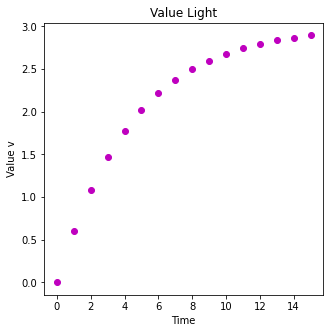

In [ ]:
r# Light (CS) is paired with 3 juice drops (US)

# initiate the learning rate: this should neither be too high nor too low
# often, it should decrease over time
alpha = 0.2

# let's assume that 1 food item yields a reward of 1
r = 3

n_steps = 16 # the animal observes 15 pairings of CS and US

# we initialise the value of the light as 0
# (initial values are important in more complicated examples)
v     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):
  v[iter+1] = v[iter] + alpha * (r - v[iter])

plt.rcParams['figure.figsize'] = [5, 5]
plot_vals(np.arange(n_steps),v,"Value Light","Time","Value v",'mo')

Now, let's assume the light is consistently **paired with a second CS**, a tone. Let's further assume that

$$V_{LA} = V_L + V_A \tag{2} $$

That is, the aggregate associate strength of the paired light and sound is the **sum of the individual associate srengths** (this is obviously a strong assumption).

Thus:

$$V_{LA} \leftarrow V_{LA}+\alpha\cdot(r-V_{LA})=V_L + V_A+\alpha\cdot(r-(V_L + V_A)) \tag{3} $$


For simplicity, let's assume that the **prediction error** weighted by the learning rate $\alpha\cdot(r-(V_L + V_A))$ is attributed equally to $V_L$ and $V_A$, i.e.:

$$\Delta V_L = (\alpha\cdot(r-(V_L + V_A))) \cdot 0.5 \tag{4} $$



$$\Delta V_A = (\alpha\cdot(r-(V_L + V_A))) \cdot 0.5 $$

In [ ]:
# @title Exercise 4.1: Blocking

Can you implement blocking using Rescorla-Wagner learning? Hints:
- Use the **single value association learning code** for the light above
- Add a **second value for the sound**
- Define a **time step when this second option is introduced** (you can increase n_steps for better visibility)
- During the learning, use an **if-statement** that implements single association learning (as in 1) for when 'iter' is smaller than the time step when the second option is introduced, and combined learning (as in 3 and 4) when both actions are present.
- **Change the timing** of when the second option is introduced to see different levels of blocking

If you're stuck, you can also check the partial solution code below (blanks for when you have to fill in code) or the full solution code - but ideally start writing your own code!

In [ ]:
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

# Your code goes here

In [ ]:
# @title Partial Solution
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

# Initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 3

n_steps = 50 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 2

# Try different values for different degrees of blocking:
# TS_A = 2 # time setp when second CS (sound) is introduced
# TS_A = 10 # time setp when second CS (sound) is introduced
TS_A = 20 # time setp when second CS (sound) is introduced

# we initialise the value of choosing an option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v_L     = np.zeros(n_steps)
v_A     = np.zeros(n_steps)

#####
# uncomment and fill in the blanks:
#####
# for iter in np.arange(n_steps-1):

  # if iter>=TS_A:
    # prediction_error = ...
    # v_L[iter+1] = ...
    # v_A[iter+1] = ...
  # else:
    # prediction_error = (r - v_L[iter])
    # v_L[iter+1] = ...

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v_L,'mo',markersize=14,label="Light")
plt.plot(np.arange(n_steps),v_A,'bo',markersize=14,label="Sound")
plt.legend()
plt.show()

In [ ]:
# @title Full Solution
# A Rescorla-Wagner model of blocking
# Light (CS_2) is paired with 3 juice drops (US)
# After some time, a sound (CS_2) is consistently paired with the light

# Initiate the learning rate: this should neither be too high nor too low
# often, this should decrease over time
alpha = 0.2

# let's assume that 1 food item at a reward of 1
r = 3

n_steps = 50 # the chicken makes 15 choices (and obtains 15 rewards)

n_options = 2

# Try different values for different degrees of blocking:
# TS_A = 2 # time setp when second CS (sound) is introduced
# TS_A = 10 # time setp when second CS (sound) is introduced
TS_A = 20 # time setp when second CS (sound) is introduced

# we initialise the value of choosing an option as 0.5 (think of this as a 'go' bias)
# (initial values are important in more complicated examples)
v_L     = np.zeros(n_steps)
v_A     = np.zeros(n_steps)

for iter in np.arange(n_steps-1):

  if iter>=TS_A:
    prediction_error = (r - (v_L[iter]+v_A[iter]))
    v_L[iter+1] = v_L[iter] + (alpha * prediction_error) * 0.5
    v_A[iter+1] = v_A[iter] + (alpha * prediction_error) * 0.5
  else:
    prediction_error = (r - v_L[iter])
    v_L[iter+1] = v_L[iter] + alpha * prediction_error

print("Output should look like this:")

plt.rcParams['figure.figsize'] = [15, 5]
plt.figure()
plt.title("Value options")
plt.xlabel("Time")
plt.ylabel("Value v")
plt.plot(np.arange(n_steps),v_L,'mo',markersize=14,label="Light")
plt.plot(np.arange(n_steps),v_A,'bo',markersize=14,label="Sound")
plt.legend()
plt.show()

In [ ]:
#@title Exercise 4.2 Terminology

In the above examples, can you identify the structure of RL problems? Sepcifically:

i) what **kinds of policies** were implemented?

ii) what **value functions** did you see? What exactly was learned in these value functions - and how does this relate to the idea of incorporating delayed rewards in the RL problem?

iii) Did we use any **models of the environment**? How might they be useful in the problems defined above?